In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib notebook

df = pd.read_csv('../../data/boston_housing_dataset.csv')

X = df['lstat'][:,np.newaxis]
y = df['medv'][:,np.newaxis]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

intercept = lin_reg.intercept_

In [2]:
def lineal_regression(x, b):
    return intercept + b * x

def cost_function(b):
    b = np.atleast_2d(np.asarray(b))
    return np.average(np.abs(y - lineal_regression(x, b)), axis=1)

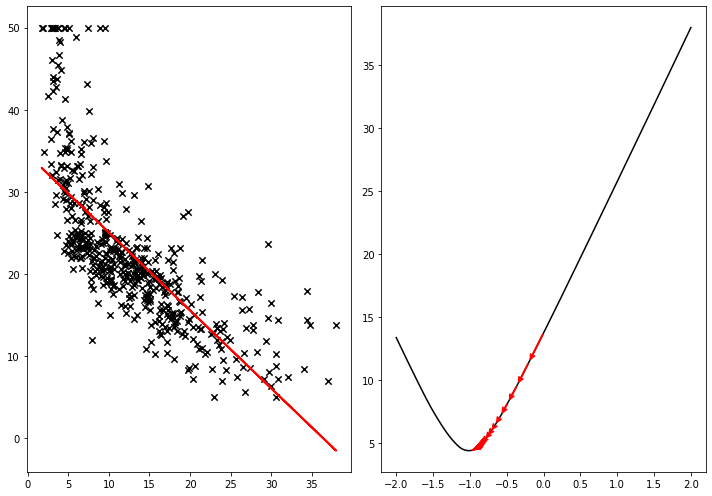

In [3]:
x = X.flatten()
y = y.flatten()
m = len(X)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,7))

axis[0].scatter(x, y)

theta1_grid = np.linspace(-2, 2, m)
J_grid = cost_function(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
axis[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 50
alpha = 0.001
theta1 = [0]
J = [cost_function(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum((lineal_regression(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_function(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
axis[0].plot(x, lineal_regression(x, theta1[0]), color='red', lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))

# Labels, titles and a legend.
#ax[1].scatter(theta1, J, c='black', s=40, lw=0)
#ax[1].set_xlim(-alpha*N*1000, alpha*N*100)

for j in range(1,N):
    axis[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 2},
                   va='center', ha='center')

    axis[0].clear()
    axis[0].scatter(x, y, marker='x', s=40, color='k')
    axis[0].plot(x, lineal_regression(x, theta1[j]), color='red', lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

    fig.canvas.draw()
    import time
    time.sleep(0.1)
        
plt.tight_layout()
plt.show()